In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

### Handeling MissingValues

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Target distribution
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
#delete unwanted column
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [9]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [10]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Outlier Handleling

<Axes: xlabel='amount'>

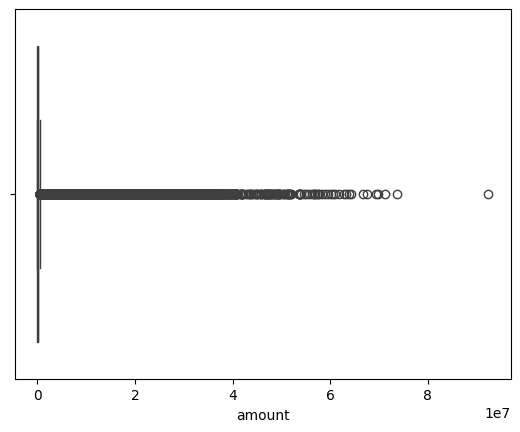

In [12]:
sns.boxplot(x = df['amount'])


During exploratory data analysis, we observed that the `amount` column contains a large number of extreme values (outliers), as shown in the boxplot. Since financial frauds are often associated with unusually high-value transactions, removing these outliers could lead to loss of important patterns related to fraudulent behavior.

Therefore, instead of dropping them, we applied a log transformation using `FunctionTransformer` from `scikit-learn`. This transformation helps in compressing the range of high values, reducing skewness and minimizing the impact of outliers during model training.


In [13]:
from sklearn.preprocessing import FunctionTransformer

In [14]:
ft = FunctionTransformer(func = np.log1p)

In [15]:
df['amount'] = ft.fit_transform(df['amount'])

<Axes: xlabel='amount'>

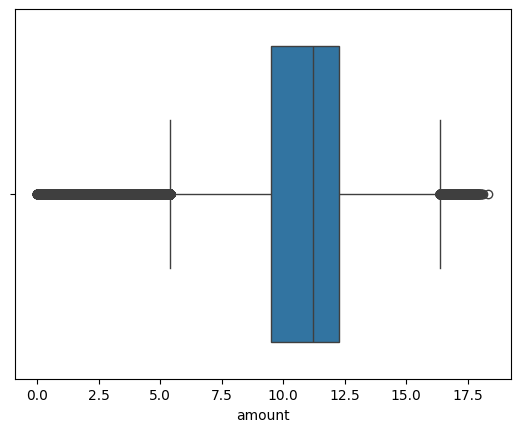

In [16]:
sns.boxplot(x = df['amount'])

<Axes: xlabel='oldbalanceOrg'>

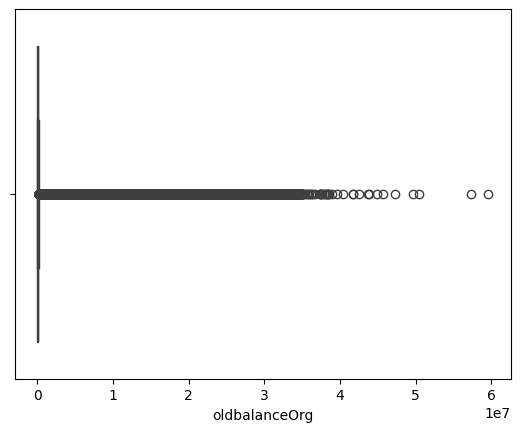

In [17]:
sns.boxplot(x = df['oldbalanceOrg'])

In [18]:
df['oldbalanceOrg'] = ft.fit_transform(df['oldbalanceOrg'])

<Axes: xlabel='oldbalanceOrg'>

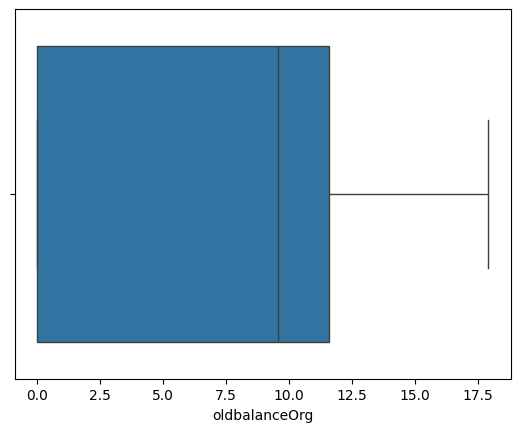

In [19]:
sns.boxplot(x = df['oldbalanceOrg'])

<Axes: xlabel='newbalanceOrig'>

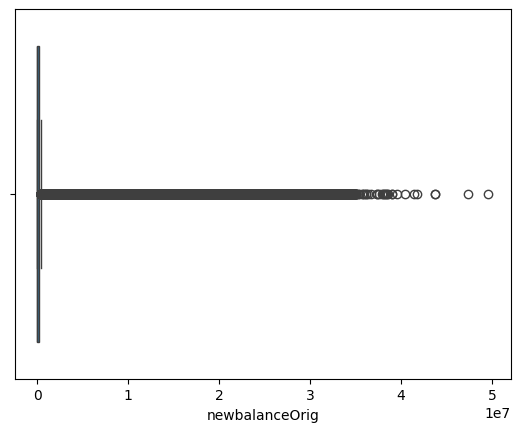

In [20]:
sns.boxplot(x = df['newbalanceOrig'])

In [21]:
df['newbalanceOrig'] = ft.fit_transform(df['newbalanceOrig'])

<Axes: xlabel='newbalanceOrig'>

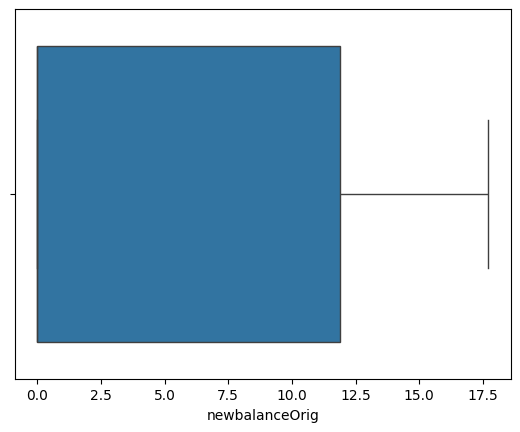

In [22]:
sns.boxplot(x = df['newbalanceOrig'])

<Axes: xlabel='oldbalanceDest'>

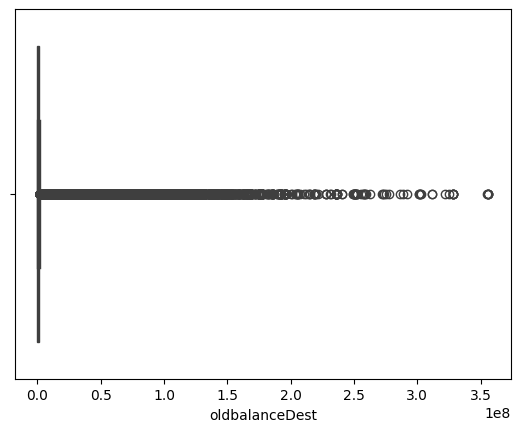

In [23]:
sns.boxplot(x = df['oldbalanceDest'])

In [24]:
df['oldbalanceDest'] = ft.fit_transform(df['oldbalanceDest'])

<Axes: xlabel='oldbalanceDest'>

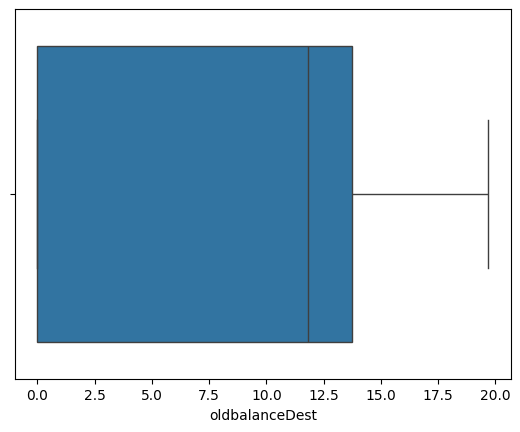

In [25]:
sns.boxplot(x = df['oldbalanceDest'])

<Axes: xlabel='newbalanceDest'>

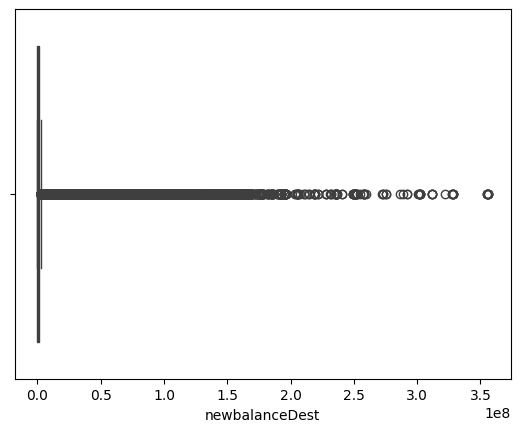

In [26]:
sns.boxplot(x = df['newbalanceDest'])

In [27]:
df['newbalanceDest'] = ft.fit_transform(df['newbalanceDest'])

<Axes: xlabel='newbalanceDest'>

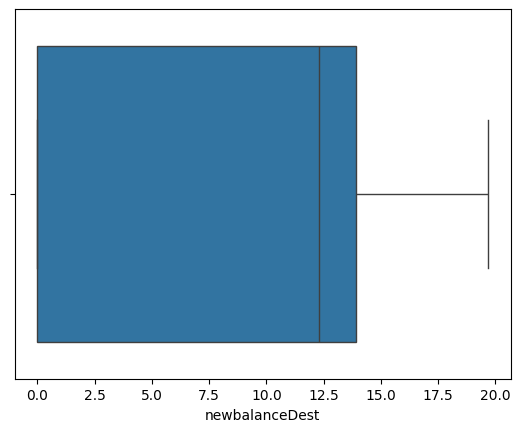

In [28]:
sns.boxplot(x = df['newbalanceDest'])

### Outlier Treatment

The dataset contained extreme values (outliers) in several columns such as:
- `amount`
- `oldbalanceOrg`
- `newbalanceOrig`
- `oldbalanceDest`
- `newbalanceDest`

To reduce the impact of these outliers and normalize the skewed distributions, we applied a **log transformation using `np.log1p`**. This transformation helps:
- Compress large values
- Make the distribution more normal-like
- Improve model stability and performance

This step was crucial to ensure that the model does not get biased by extreme transaction values.


### Visualization

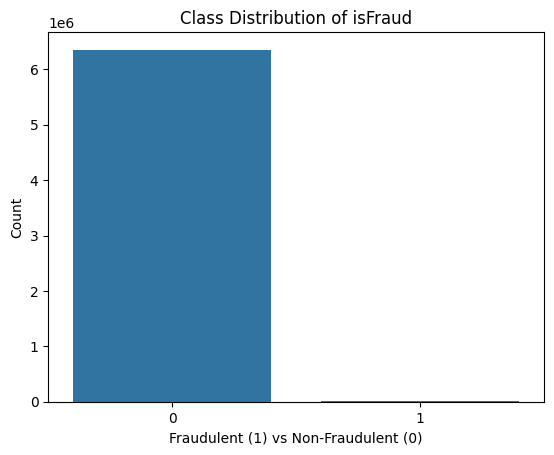

In [29]:
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution of isFraud')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.show()


This bar chart shows the distribution of the target variable `isFraud`. It is clearly visible that the dataset is highly imbalanced — with a huge number of non-fraudulent transactions (`isFraud = 0`) and very few fraudulent ones (`isFraud = 1`). This imbalance can negatively affect the performance of most classification models, hence handling it is crucial before training.


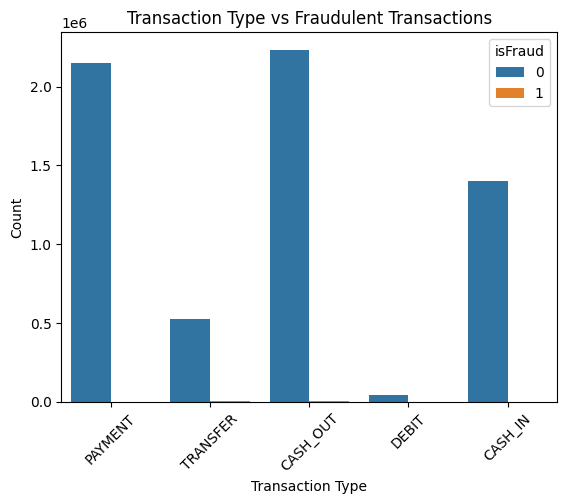

In [30]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.show()


This chart compares the count of each transaction type with respect to the `isFraud` label. It highlights which types of transactions are most commonly associated with fraud. For example, most fraud cases are concentrated in `PAYMENT` and `CASH_OUT` transactions, indicating that these types are more vulnerable to fraudulent behavior.


### Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe = OneHotEncoder(drop = 'first')

In [33]:
encode_arr = ohe.fit_transform(df[['type']]).toarray()

In [34]:
encoded_cols = ohe.get_feature_names_out(['type'])

In [35]:
encode_type = pd.DataFrame(encode_arr , columns = encoded_cols , index = df.index)

In [36]:
# Concatenate encoded columns to original df
df = pd.concat([df, encode_type], axis=1)

In [37]:
df.drop('type', axis=1, inplace=True)

We chose One-Hot Encoding over Label Encoding because:
- The `type` feature has **non-ordinal** categories (no natural order)
- Label Encoding would have introduced a false sense of ranking
- One-Hot Encoding ensures that each transaction type is treated as an independent feature

This transformation resulted in new columns such as:
- type_CASH_OUT
- type_TRANSFER
- type_PAYMENT
- type DEBIT
etc.

In [38]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.000000,0.0,0,0,0.0,0.0,1.0,0.0
1,1,7.531166,9.964112,9.872292,0.000000,0.0,0,0,0.0,0.0,1.0,0.0
2,1,5.204007,5.204007,0.000000,0.000000,0.0,1,0,0.0,0.0,0.0,1.0
3,1,5.204007,5.204007,0.000000,9.960954,0.0,1,0,1.0,0.0,0.0,0.0
4,1,9.364703,10.634773,10.305174,0.000000,0.0,0,0,0.0,0.0,1.0,0.0


In [39]:
# Create correlation matrix
corr_matrix = df.corr()

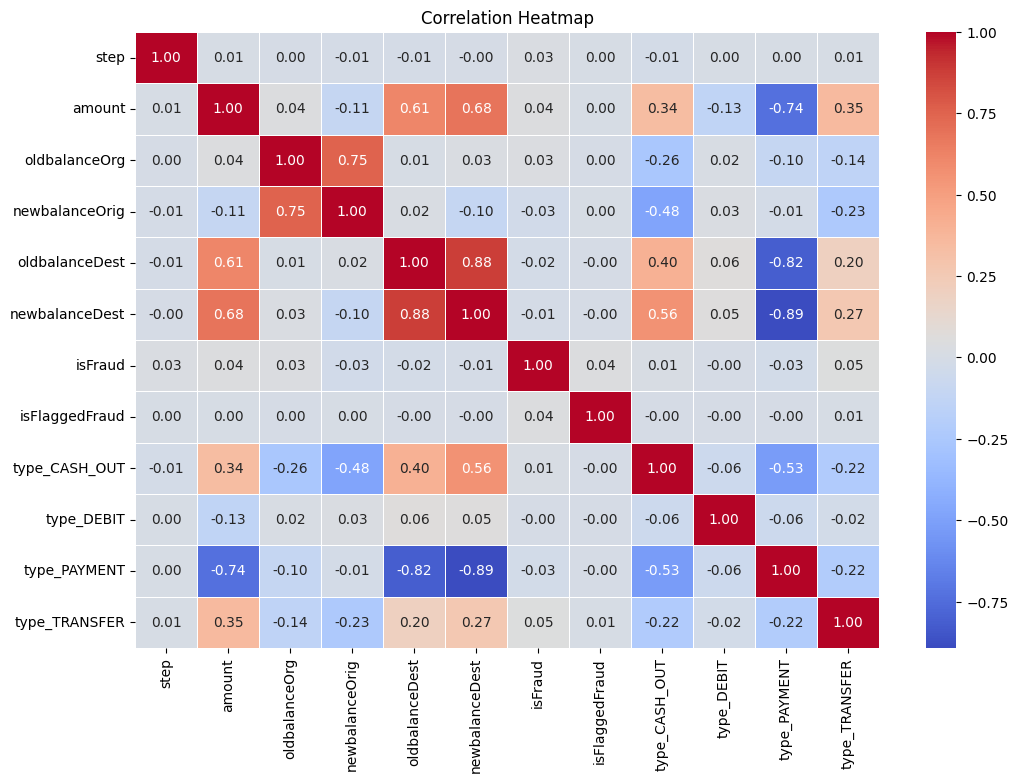

In [40]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis

We plotted a correlation heatmap to detect multicollinearity and understand relationships between features. We observed high correlation between `oldbalanceDest` and `newbalanceDest` (0.88), which could cause redundancy in certain models.

The target variable `isFraud` showed moderate positive correlation with `type_TRANSFER`, and negative correlation with `type_CASH_OUT`, confirming that fraud is more common in TRANSFER transactions.

Additionally, `isFlaggedFraud` had no meaningful correlation with any feature, so it was removed from the dataset.


In [41]:
df.drop(['isFlaggedFraud'], axis=1, inplace=True)

### Applying Model

In [42]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Due to extremely high class imbalance and resource constraints, we used `class_weight='balanced'` which internally adjusts the importance of fraud vs non-fraud classes, ensuring the model doesn't bias toward the majority.


In [43]:
df.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.0,0.0,0,0.0,0.0,1.0,0.0
1,1,7.531166,9.964112,9.872292,0.0,0.0,0,0.0,0.0,1.0,0.0
2,1,5.204007,5.204007,0.000000,0.0,0.0,1,0.0,0.0,0.0,1.0


In [44]:
x = df.drop(columns = 'isFraud', axis=1)
y = df['isFraud']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 43)

In [47]:
from sklearn.linear_model import LogisticRegression

### Fraud Detection Model

We used **Logistic Regression** as our baseline model for fraud detection.

Since the dataset is **highly imbalanced** (Fraud cases are very few), we used `class_weight='balanced'` in the LogisticRegression model.  
This makes the model give more importance to the minority class (`isFraud = 1`) during training.

We also used **log-transformation** for numerical columns with heavy outliers to stabilize variance without dropping valuable data.


In [48]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [49]:
y_pred = model.predict(x_test)

In [50]:
y_proba = model.predict_proba(x_test)[:, 1]

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1908786,))

In [52]:
y_proba

array([2.16769377e-01, 2.93968373e-24, 1.49057057e-03, ...,
       1.08995007e-16, 1.56858988e-09, 1.00334881e-17], shape=(1908786,))

In [53]:
model.score(x_test , y_test)*100

95.55618073477069

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [55]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1821544   84805]
 [     18    2419]]


### Clasification Report

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906349
           1       0.03      0.99      0.05      2437

    accuracy                           0.96   1908786
   macro avg       0.51      0.97      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



- Accuracy: 96%
- Recall for Fraud: 0.99  (Excellent fraud detection)
- Precision for Fraud: 0.03  (Many false positives)
- Confusion Matrix:

|              | Predicted: Not Fraud | Predicted: Fraud |
|--------------|----------------------|------------------|
| Actual: Not Fraud | 18,21,544         | 84,805            |
| Actual: Fraud     | 18               | 2,419             |

This shows the model is very sensitive to fraud but sometimes misclassifies normal transactions as fraud — which is acceptable in high-risk scenarios.


###  Conclusion
Logistic Regression, with balanced class weights, was effective for this task. It successfully captured fraud patterns with high recall. The results show that the model can be deployed as a base fraud detection mechanism to flag potentially fraudulent activity.

In [66]:
from sklearn.tree import DecisionTreeClassifier 

In [67]:
dtc = DecisionTreeClassifier()

In [68]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [69]:
dtc.score(x_test , y_test)*100

99.9705572023265

In [70]:
y_prd = dtc.predict(x_test)

In [71]:
cm = confusion_matrix(y_test, y_prd)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1906110     239]
 [    323    2114]]


In [72]:
print(classification_report(y_test, y_prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906349
           1       0.90      0.87      0.88      2437

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



## Model: Decision Tree Classifier

After testing Logistic Regression, we now evaluate the *Decision Tree Classifier* for fraud detection.

---

###  Classification Report:

- *Accuracy*: 99.97%
- *Precision (Fraud)*: 0.90
- *Recall (Fraud)*: 0.87
- *F1-score (Fraud)*: 0.88

---

###  Confusion Matrix:

|                           | *Predicted: Not Fraud* | *Predicted: Fraud* |
|---------------------------|--------------------------|----------------------|
| *Actual: Not Fraud*     | 1,906,110                | 239                  |
| *Actual: Fraud*         | 323                      | 2,114                |

###  Interpretation:

- *True Negatives (TN)* = 1,906,110
- *False Positives (FP)* = 239 → Normal transactions wrongly marked as fraud (very low).
- *False Negatives (FN)* = 323 → Missed frauds (a bit higher than Logistic Regression).
- *True Positives (TP)* = 2,114 → Correctly caught frauds.

---

###  Insights:

- Very high *precision* → Most fraud predictions are correct.
- Slightly lower *recall* than Logistic Regression → Misses a few more frauds.
- *Huge reduction in false alarms* → From 84,805 (LogReg) to just 239 (Decision Tree).

This makes the Decision Tree much more *practical* for production use where user experience matters and manual review cost is high.




## Final Comparison: Logistic Regression vs Decision Tree

| Metric              | Logistic Regression        | Decision Tree Classifier      |
|---------------------|-----------------------------|-------------------------------|
| Accuracy            | 96%                        | 99.97%                        |
| Precision (Fraud)   | 0.03 (very low)            | 0.90 (high)                  |
| Recall (Fraud)      | 0.99 (excellent)           | 0.87 (very good)             |
| False Positives     | 84,805                     | 239                           |
| False Negatives     | 18                         | 323                           |

---

### 🧠 Summary:

- *Logistic Regression*:
  - Catches almost every fraud (recall = 0.99)
  - But wrongly flags *many normal users* → 84,805 false positives
  - Useful in *high-risk* use cases where missing fraud is not acceptable





- *Decision Tree Classifier*:
      - Misses some frauds (recall = 0.87)
      - But flags *very few false frauds* → Only 239 false positives
      - Best for *real-world deployment*, where user trust and low manual reviews matter.

---

✅ *Conclusion*:
Both models are useful. Choose based on your use case:
- Use *Logistic Regression* where catching all fraud is priority.
- Use *Decision Tree* where precision and real-world practicality are more important.